**Explore** : As I go through this github, I realize how *every attention head learns something distinct*. What type of learned features are more tell-tale for us? What can be distilled?

**Explore** : Keys are where the real representation of objects is appearing and then being communicated to all parts of the image.

**Explore** What if we utilize channel-based attention? Does the K and Q values as they are now channel-insensitive?

# Feature Visualization
The main goal of feature visualization is to visually represent the features that a neural network has learned during training. These features could be anything from simple textures and patterns in early layers of a convolutional neural network (CNN) to more complex structures like parts of objects or even entire objects in deeper layers.


## 1. Activation Maximization

Consider a dense layer representation **d**. This layer reprsentation si not directly interpretable. However, using activation maximization, we can understand what features this representation **d** is learning to recognize. The technique is often used in CNNs for image recognition tasks. It works as following:

1. Choose a specific layer in the neural network **d**
2. The objective is to find an input image that maximizes the activation of a specific neuron or a group of neurons in the selected layer. The neuron(s) of interest could be those that are believed to detect certain features, like edges, textures, or more complex patterns in the case of deeper layers.
3. Start with either a random image or a blank image and iteratively adjust its pixel values through an optimization algorithm. The goal is to modify the image so that it maximizes the activation of the targeted neuron(s). This is typically done using gradient ascent where gradients are computed with respect to the input image
4. The result of this optimization is an image that is highly tuned to excite the selected neuron(s). This image is often a hyper-realistic or exaggerated representation of the patterns or features that the neuron is sensitive to.

## 2. Pixel Attribuition

This refers to techniques used to identify which pixels in an input image contribute most significantly to the output of the model. This makes the model's decisions more transparent by visually showing which areas of an input are important. The following are some approaches for pixel attribuition:

1. **Saliency Maps**: These are one of the most straightforward techniques, where the gradient of the output with respect to each input pixel is computed. The idea is that higher gradients (steeper changes in the output with respect to a small change in the input pixel value) indicate more important pixels. Saliency maps often highlight edges or specific features in an image that the model focuses on.

2. **Integrated Gradients**: This technique involves integrating the gradients along the path from a baseline (e.g., a black image) to the actual input image. This method provides a more robust measure of pixel importance across the entire path of input changes, helping to account for non-linearities in the model's response.

3. **Gradient-weighted Class Activation Mapping (Grad-CAM)**: Grad-CAM uses the gradients of any target concept (like a class output in classification tasks) flowing into the final convolutional layer to produce a coarse localization map highlighting important regions in the image for predicting the concept.

4. **LIME (Local Interpretable Model-agnostic Explanations)**: Although not exclusively focused on pixel-level interpretation, LIME can be adapted to explain predictions of image models by perturbing the image (e.g., occluding parts of the image) and observing the effect on the output. It then uses a simple model to locally approximate the behavior of the complex model around the perturbed input.

5. **SHAP (SHapley Additive exPlanations)**: SHAP values, based on game theory, measure the impact of each feature (or pixel) by considering all possible combinations of features/pixels. In the context of images, this can be computationally intensive but provides a theoretically sound measure of feature importance


**Explore:**: SHAP method sounds interesting. Explore it in more detail.   

# ViTs - Explainability Criterion:

I am following the guide by Jacob Gildenblat. The link is here [Jacob Gildenblat](https://jacobgil.github.io/deeplearning/vision-transformer-explainability)

Consider a 224 x 224 image. We split them into (16 x 16) patches with a total of (14 x 14) = 196 patches. Consider now following representation going inside the transformer block (3 x 197 x 64):
- There are 3 attention heads for our transformer.
- Each attention heads sees 197 tokens.
- Every token has a feature representation of length 64.

If for every attention head seperately, we look inside the second dimension, we would obtain the (14 x 14) = 196 tokens (discounting the classification token). Therefore, **each attention head sees all the tokens**.

Now, since each token we have flatted into the embedded dimension 64, it is actually seeing chunks of (1 x 1 x 64) vectors. In total, we have the image represention of (14 x 14 x 64) that can be visualized (only thing would change is the pixel value so the image might not be as clear)

We can then think of Q, K and V in the next way: For every image patch with $q_i$, Information is going to flow from locations in the image that have keys $k_j$ that are similar to that $q_i$.

Let us introduce further classifications:

- $q_{ic}$ is the value of the Query feature vector for one of the locations i in the image, in channel c.
- $k_{jc}$ is the value of the Key feature vector for one of the locations j in the image, in channel c. Note that we would attend across all channels.

# First Method of visualization:

For every location j in K (remember that it comes from one of the 14x14 patches in the original image), we can ask “how is that location going to spread information to other parts of the image?”

Since we take the dot product between the token vectors (every qi
 and kj
), there are two scenarios:

- Two tokens, in the same channel c, $q_{ic}$ and $k_{jc}$
, have the same sign (both are positive or negative)- their multiplication is positive.

  This means that the image location j and channel $c - k_{jc}$ - is going to contribute to flowing information into that image location $q_i$
.

- Two tokens, in the same channel c, $q_{ic}$ and $k_{jc}$, have different signs (one is positive and one is negative)- their multiplication is negative.

  This means that the image j location and channel c - $k_{jc}$ - is NOT going to contribute to flowing information into that image location $q_i$
.

To contrast the negative and positive pixels, we’re going to pass every image through a torch.nn.Sigmoid() layer (the bright values are positive, the dark values are negative).

From looking at the Q,K visualizations for different channels we think there are kind of two patterns that emerge.

Mounted at /content/drive
(962, 360)


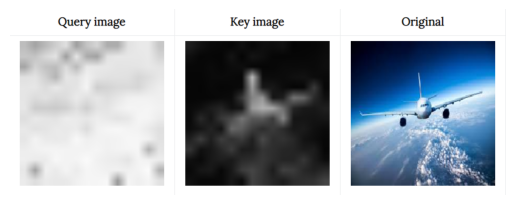

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
image_path = '/content/drive/My Drive/ViT-codes/Q_V_info.png'

from PIL import Image
import matplotlib.pyplot as plt

# Load the image
img = Image.open(image_path)

# Check the size to confirm it's 256x256 as expected
print(img.size)

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

- The key image highlights the Airplane.
- The query image highlights all the image.

For most locations in the Query image, since they are positive, information is going to flow to them only from the positive locations in the Key image - that come from the Airplane.

Q, K here are telling us -

`We found an airplane, and we want all the locations in the image to know about this!`

# Information flow in two direction


Consider the layer 11, channel 59, first attention head:

- The Query image highlights mainly the bottom part of the airplane
- The key image is negative in the top part of the Airplane

(801, 312)


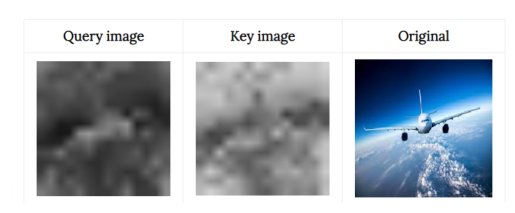

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = '/content/drive/My Drive/ViT-codes/Q_V_info2.png'

# Load the image
img = Image.open(image_path)

# Check the size to confirm it's 256x256 as expected
print(img.size)

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

- The Query image highlights mainly the  the Airplane.
The Key image highlights mainly the sarroundings of the airplane.

The information flows in two directions here:

- The top part of the plane (negative values in the Key) is going to spread into all the image (negative values in the Query).

  `Hey we found this plane, lets tell the rest of the image about it`

- Information from the “Non Plane” parts of the image (positive values in the Key) is going to flow into the bottom part of the Plane (positive values in the Query).

  ` Lets tell the plane more about what's around it.`

  Read the original article to see how **individual activations** appear for classification token.

# Attention Rollout

The images above show us how individual activations look like, but they don’t show us how the attention flows from the start to the end throughout the Transformer.

To quantify this we can use a technique called “Attention Rollout” from [Quantifying Attention Flow in Transformers, by Samira Abnar and Willem Zuidema](https://arxiv.org/abs/2005.00928)

This is also what the authors at An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale suggested.

At every Transformer block we get an attention Matrix $A_{ij}$ that defines how much attention is going to flow from token j in the previous layer to token i in the next layer.

We can multiply the Matrices between every two layers, to get the total attention flow between them.

However - we also have the residual connections (like we saw in the previous section).

We can model them by adding the identity matrix I to the layer Attention matrices: $A_{ij}+I$
.

We have multiple attention heads. What do we do about them?

The Attention rollout paper suggests taking the average of the heads. As we will see, it can make sense using other choices: like the minimum, the maximum, or using different weights.

Finally we get a way to recursively compute the Attention Rollout matrix at layer L:
$$AttentionRollout_{L} = (A_{L}+I)AttentionRollout_{L-1}$$

We also have to normalize the rows, to keep the total attention flow 1.

  Read the original article for more.



# Gradient